In [1]:
# 导入必要的库
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler

# 下载LFW人脸数据集
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data  # 提取图像数据
n_samples, h, w = lfw_people.images.shape  # 获取图像的尺寸

# 输出数据形状
print("Number of samples:", n_samples)
print("Image height:", h)
print("Image width:", w)

# 数据标准化处理
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# 输出标准化后的数据形状
print("Normalized data shape:", X_normalized.shape)


Number of samples: 1288
Image height: 50
Image width: 37
Normalized data shape: (1288, 1850)


In [2]:
# 导入必要的库
from sklearn.decomposition import PCA

# 使用PCA进行降维
n_components = 150  # 降维到150维
pca = PCA(n_components=n_components, whiten=True).fit(X_normalized)
X_pca = pca.transform(X_normalized)

# 输出降维后的数据形状
print("PCA transformed data shape:", X_pca.shape)


PCA transformed data shape: (1288, 150)


In [3]:
# 导入必要的库
from sklearn.mixture import GaussianMixture

# 高斯混合模型初始化和训练
n_clusters = 7  # 假设我们要将面部图像分成7类
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
gmm.fit(X_pca)

# 输出模型参数
print("Means shape:", gmm.means_.shape)
print("Covariances shape:", gmm.covariances_.shape)
print("Weights:", gmm.weights_)


Means shape: (7, 150)
Covariances shape: (7, 150, 150)
Weights: [0.10481366 0.20807837 0.00310559 0.0007764  0.20266713 0.0636646
 0.41689425]


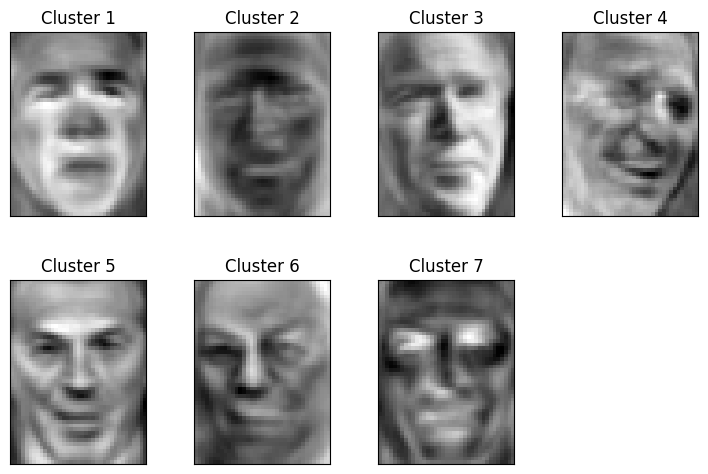

In [4]:
# 导入必要的库
import matplotlib.pyplot as plt

# 定义绘制面部图像的函数
def plot_faces(images, titles, h, w, n_row=2, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(len(images)):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# 获取每个聚类的中心（均值）
mean_faces_pca = gmm.means_

# 将PCA空间中的均值逆变换回原始空间
mean_faces_original = pca.inverse_transform(mean_faces_pca)

# 为每个聚类中心设置标题
titles = [f'Cluster {i + 1}' for i in range(n_clusters)]

# 绘制聚类中心面部图像
plot_faces(mean_faces_original, titles, h, w, n_row=2, n_col=4)
plt.show()
